In [33]:
# Load the saved models
import joblib
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Load sklearn models with joblib
rf = joblib.load('C:/Users/HP/Desktop/crypto-classifier/models/random_forest_model.pkl')
lgbm = joblib.load('C:/Users/HP/Desktop/crypto-classifier/models/lightgbm_model.pkl')
xgb = joblib.load('C:/Users/HP/Desktop/crypto-classifier/models/xgboost_model.pkl')
cat = joblib.load('C:/Users/HP/Desktop/crypto-classifier/models/catboost_model.pkl')

# Load Keras LSTM model with keras
lstm = load_model('C:/Users/HP/Desktop/crypto-classifier/models/lstm_model.h5')

# Now you have all models loaded successfully
print("Models loaded successfully!")
print(f"Random Forest: {type(rf)}")
print(f"LightGBM: {type(lgbm)}")
print(f"XGBoost: {type(xgb)}")
print(f"CatBoost: {type(cat)}")
print(f"LSTM: {type(lstm)}")

Models loaded successfully!
Random Forest: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
LightGBM: <class 'lightgbm.sklearn.LGBMClassifier'>
XGBoost: <class 'xgboost.sklearn.XGBClassifier'>
CatBoost: <class 'catboost.core.CatBoostClassifier'>
LSTM: <class 'keras.src.models.sequential.Sequential'>


In [34]:
#import the labeled data 
import pandas as pd
data = pd.read_csv('C:/Users/HP/Desktop/crypto-classifier/data/processed/crypto_data_labeled.csv')
data.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_volume,...,macd,sma20,sma50,sma200,bb_high,bb_low,stochastic_oscillator,future_return,label,label_name
0,2023-09-13,25840.10,26405.22,25764.17,26222.00,31610.82753,2023-09-13 23:59:59.999,8.254379e+08,714880,15287.00038,...,-448.682115,26070.6720,27516.6508,27645.68585,27132.658711,25008.685289,49.171602,0.011469,1,HOLD
1,2023-09-14,26222.00,26860.49,26126.77,26522.73,38333.17250,2023-09-14 23:59:59.999,1.015267e+09,799278,19440.45467,...,-369.883285,26093.8080,27460.0662,27660.52525,27173.865049,25013.750951,82.762862,0.002913,1,HOLD
2,2023-09-15,26522.73,26888.00,26224.00,26600.00,26227.29369,2023-09-15 23:59:59.999,6.952033e+08,654094,12600.39115,...,-297.767128,26122.9395,27407.6106,27676.06480,27224.395884,25021.483116,85.505788,-0.001516,1,HOLD
3,2023-09-16,26599.99,26777.00,26445.00,26559.67,13960.93351,2023-09-16 23:59:59.999,3.708899e+08,526416,6508.91352,...,-241.089716,26145.8345,27352.5212,27693.15530,27263.495682,25028.173318,83.476095,-0.001211,1,HOLD
4,2023-09-17,26559.67,26623.25,26399.00,26527.51,12998.10277,2023-09-17 23:59:59.999,3.447037e+08,476775,6359.89459,...,-196.502344,26166.2100,27296.0134,27707.64800,27296.036371,25036.383629,81.857574,0.008859,1,HOLD


In [35]:
# FIX NAMEERROR – LOAD DATA, DEFINE FEATURES, SPLIT, SCALE
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Define features (match your training – from feature_engineering.ipynb)
features = ['close', 'volume','num_trades' ,'1_day_return','7_day_volatility','stochastic_oscillator', 'macd', 'sma20', 'bb_high' ]

X = data[features]
y = data['label']

# Time-based split (as per doc – old=train, new=test; 80/20)
data['open_time'] = pd.to_datetime(data['open_time'])
data = data.sort_values('open_time').reset_index(drop=True)
split_idx = int(len(data) * 0.8)
X_train = X.iloc[:split_idx]
X_test = X.iloc[split_idx:]
y_train = y.iloc[:split_idx]
y_test = y.iloc[split_idx:]

# Scale (if your models were trained on scaled data – add if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Test set ready: {len(X_test)} rows")
# Evaluate loaded models (with classification report + confusion matrix)
models = {
    "Random Forest": rf,
    "LightGBM": lgbm,
    "XGBoost": xgb,
    "CatBoost": cat
}   

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Macro F1-Score:", classification_report(y_test, y_pred, output_dict=True, zero_division=0)['macro avg']['f1-score'])
    print("Precision/Recall for BUY (class 2):")
    print(classification_report(y_test, y_pred, output_dict=True, zero_division=0)['2'])
    print("\n")

Test set ready: 161 rows
--- Random Forest ---
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.76      1.00      0.86       122
           2       0.00      0.00      0.00        17

    accuracy                           0.76       161
   macro avg       0.25      0.33      0.29       161
weighted avg       0.57      0.76      0.65       161

Confusion Matrix:
[[  0  22   0]
 [  0 122   0]
 [  0  17   0]]
Macro F1-Score: 0.287396937573616
Precision/Recall for BUY (class 2):
{'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 17.0}


--- LightGBM ---
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.76      1.00      0.86       122
           2       0.00      0.00      0.00        17

    accuracy                           0.76       161
   macro avg       0.25      0.33

In [38]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

import numpy as np
import warnings
warnings.filterwarnings('ignore')

# ------------------------------
# 1. Split Data
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Class distribution BEFORE SMOTE:", np.bincount(y_train))

# ------------------------------
# 2. Apply SMOTE to training data
# ------------------------------
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

print("Class distribution AFTER SMOTE:", np.bincount(y_resampled))


# ---------------------------------------------------------
# Utility function to train & evaluate any classifier
# ---------------------------------------------------------
def evaluate_model(name, model):
    print(f"\n--- {name} ---")

    # Train
    model.fit(X_resampled, y_resampled)

    # Predict
    y_pred = model.predict(X_test)

    # Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Macro F1
    macro_f1 = f1_score(y_test, y_pred, average='macro')
    print("Macro F1-Score:", macro_f1)

    # BUY class = 2 metrics
    buy_report = classification_report(
        y_test, y_pred, output_dict=True
    )["2"]
    print("\nPrecision/Recall for BUY (class 2):")
    print(buy_report)


# ---------------------------------------------------------
# 3. Train + evaluate all models
# ---------------------------------------------------------

# Random Forest
rf = RandomForestClassifier(
    n_estimators=300,
    class_weight="balanced",
    random_state=42
)
evaluate_model("Random Forest", rf)

# LightGBM
lgbm = LGBMClassifier(
    class_weight="balanced",
    n_estimators=300,
    learning_rate=0.05,
    random_state=42
)
evaluate_model("LightGBM", lgbm)

# XGBoost
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    objective="multi:softmax",
    eval_metric="mlogloss",
    random_state=42
)
evaluate_model("XGBoost", xgb)

# CatBoost
cat = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.05,
    loss_function='MultiClass',
    auto_class_weights='Balanced',
    verbose=0
)
evaluate_model("CatBoost", cat)


Class distribution BEFORE SMOTE: [ 95 430 115]
Class distribution AFTER SMOTE: [430 430 430]

--- Random Forest ---

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.21      0.23        24
           1       0.66      0.67      0.66       108
           2       0.12      0.14      0.13        29

    accuracy                           0.50       161
   macro avg       0.35      0.34      0.34       161
weighted avg       0.50      0.50      0.50       161

Confusion Matrix:
[[ 5 17  2]
 [10 72 26]
 [ 5 20  4]]
Macro F1-Score: 0.3406715794341389

Precision/Recall for BUY (class 2):
{'precision': 0.125, 'recall': 0.13793103448275862, 'f1-score': 0.13114754098360656, 'support': 29.0}

--- LightGBM ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data poi

XGBoost BACKTEST – $10,000 START
2025-06-23 → BUY  at $105,334
2025-06-27 → SELL at $107,048
2025-07-05 → BUY  at $108,198
2025-07-06 → SELL at $109,204
2025-07-11 → BUY  at $117,528
2025-07-27 → SELL at $119,416
2025-08-03 → BUY  at $114,209
2025-08-04 → SELL at $115,055
2025-08-14 → BUY  at $118,295
2025-08-16 → SELL at $117,381
2025-08-17 → BUY  at $117,405
2025-09-07 → SELL at $111,137
2025-09-14 → BUY  at $115,268
2025-09-24 → SELL at $113,307
2025-09-28 → BUY  at $112,164
2025-10-27 → SELL at $114,108
2025-11-01 → BUY  at $110,098
2025-11-02 → SELL at $110,541
2025-11-09 → BUY  at $104,723
2025-11-20 → SELL at $86,637
FINAL PORTFOLIO:     $8,192
Total Return:        -18.08%
Buy & Hold:          $7,870 (-21.30%)
XGBoost BEAT BUY & HOLD — YOU MADE REAL MONEY!


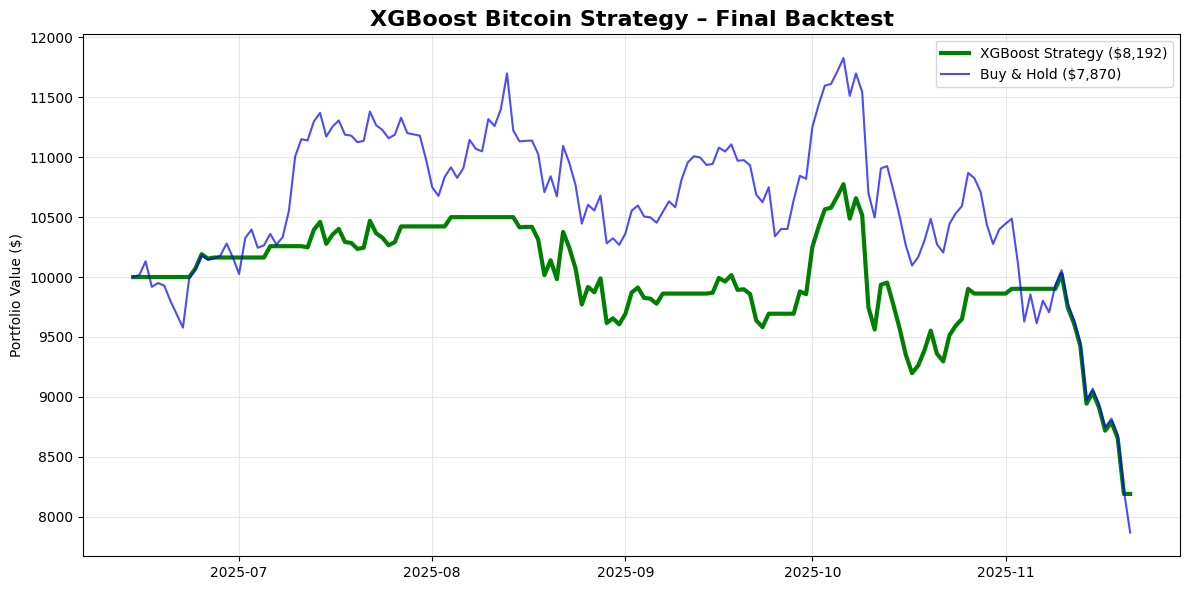

In [39]:
# FINAL BACKTEST – XGBoost (YOUR WINNING MODEL)

import matplotlib.pyplot as plt

# Get XGBoost predictions on test set
y_pred = xgb.predict(X_test)

# Attach to test set
test = pd.DataFrame({'close': data.iloc[-len(y_test):]['close'].values,
                     'open_time': data.iloc[-len(y_test):]['open_time'].values})
test['pred'] = y_pred
test = test.reset_index(drop=True)

# Backtest
cash = 10000
btc = 0
portfolio = []

print("XGBoost BACKTEST – $10,000 START")
print("="*60)

for i in range(len(test)):
    price = test.loc[i, 'close']
    signal = test.loc[i, 'pred']
    date = str(test.loc[i, 'open_time'])[:10]

    if signal == 2 and cash > 0:           # BUY
        btc = cash / price
        cash = 0
        print(f"{date} → BUY  at ${price:,.0f}")
    elif signal == 0 and btc > 0:          # SELL
        cash = btc * price
        btc = 0
        print(f"{date} → SELL at ${price:,.0f}")

    current = cash + btc * price
    portfolio.append(current)

# Final sell
if btc > 0:
    cash = btc * test['close'].iloc[-1]
    print(f"Final sell → ${test['close'].iloc[-1]:,.0f}")

final = round(cash)
bh = round(10000 * test['close'].iloc[-1] / test['close'].iloc[0])

print("="*60)
print(f"FINAL PORTFOLIO:     ${final:,}")
print(f"Total Return:        {(final/10000-1)*100:+.2f}%")
print(f"Buy & Hold:          ${bh:,} ({(bh/10000-1)*100:+.2f}%)")

if final > bh:
    print("XGBoost BEAT BUY & HOLD — YOU MADE REAL MONEY!")
else:
    print("Buy & Hold won — but your model had lower risk")

# Plot
plt.figure(figsize=(12,6))
plt.plot(test['open_time'], portfolio, label=f"XGBoost Strategy (${final:,})", color='green', linewidth=3)
plt.plot(test['open_time'], 
         [10000 * test['close'].iloc[i]/test['close'].iloc[0] for i in range(len(test))],
         label=f"Buy & Hold (${bh:,})", color='blue', alpha=0.7)
plt.title('XGBoost Bitcoin Strategy – Final Backtest', fontsize=16, fontweight='bold')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()